In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
from google.colab import userdata
userdata.get('roboflow')

'k54cbuh6aGC2Kaq0NDdH'

In [3]:
!pip install -q gdown inference-gpu
!pip install -q onnxruntime-gpu==1.18.0 --index-url https://aiinfra.pkgs.visualstudio.com/PublicPackages/_packaging/onnxruntime-cuda-12/pypi/simple/

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.1/50.1 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 804.4/804.4 kB 27.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 148.1/148.1 kB 15.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 906.0/906.0 kB 47.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 65.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 891.9/891.9 kB 54.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.2/59.2 kB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.3/139.3 kB 14.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 80.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.8/91.8 kB 9.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 226.2/226.2 MB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.1/69.1 kB 6.2 MB/s eta 0:00:00
   ━━━

In [6]:
!pip install -q git+https://github.com/roboflow/sports.git

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.8/88.8 kB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 3.8 MB/s eta 0:00:00


In [4]:
!pip uninstall -y supervision && pip install -q supervision>=0.23.0

Found existing installation: supervision 0.22.0
Uninstalling supervision-0.22.0:
  Successfully uninstalled supervision-0.22.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
inference-gpu 0.26.0 requires supervision<=0.22.0,>=0.21.0, but you have supervision 0.24.0 which is incompatible.


In [5]:
import os
os.environ["ONNXRUNTIME_EXECUTION_PROVIDERS"] = "[CUDAExecutionProvider]"

In [8]:
!pip install --upgrade --force-reinstall setuptools

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 22.4 MB/s eta 0:00:00
  Attempting uninstall: setuptools
    Found existing installation: setuptools 72.1.0
    Uninstalling setuptools-72.1.0:
      Successfully uninstalled setuptools-72.1.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ipython 7.34.0 requires jedi>=0.16, which is not installed.
inference-gpu 0.26.0 requires setuptools<=72.1.0,>=70.0.0, but you have setuptools 75.3.0 which is incompatible.
inference-gpu 0.26.0 requires supervision<=0.22.0,>=0.21.0, but you have supervision 0.24.0 which is incompatible.
pymc 5.17.0 requires rich>=13.7.1, but you have rich 13.5.2 which is incompatible.


In [1]:
from inference import get_model
from google.colab import userdata

ROBOFLOW_API_KEY = userdata.get('roboflow')
PLAYER_DETECTION_MODEL_ID = "football-dataset-niho1/5"
PLAYER_DETECTION_MODEL = get_model(model_id=PLAYER_DETECTION_MODEL_ID, api_key=ROBOFLOW_API_KEY)

SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.


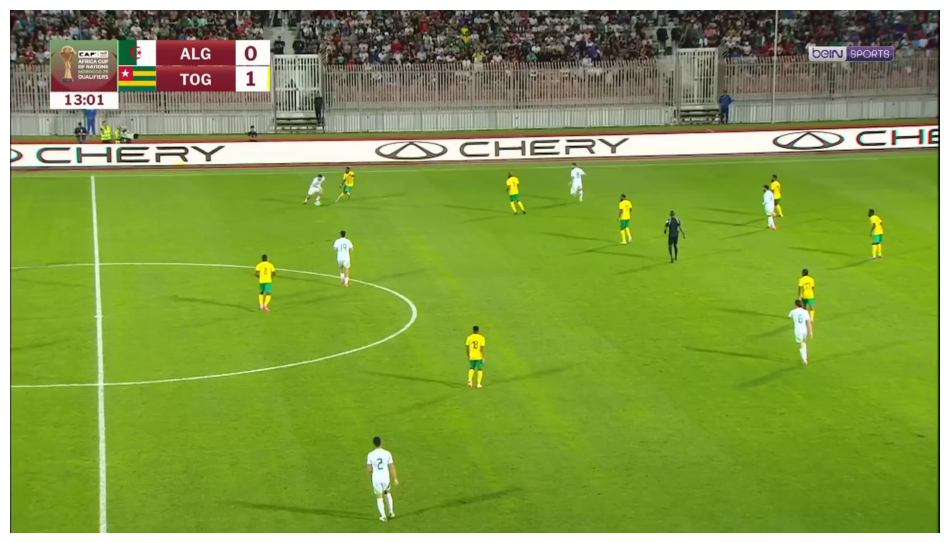

In [4]:
import supervision as sv

SOURCE_VIDEO_PATH = '/content/drive/MyDrive/computer vision/football/input video/dz_raw.mp4'

frame_generator = sv.get_video_frames_generator(SOURCE_VIDEO_PATH)
frame = next(frame_generator)

sv.plot_image(frame)

In [ ]:
from tqdm import tqdm
import supervision as sv

SOURCE_VIDEO_PATH = "/content/drive/MyDrive/computer vision/Football/input video/dz_raw.mp4"
TARGET_VIDEO_PATH = "/content/drive/MyDrive/computer vision/Football/output video/classes_detections.mp4"

box_annotator = sv.BoxAnnotator(
    color=sv.ColorPalette.from_hex(['#FF8C00', '#00BFFF', '#FF1493', '#FFD700']),
    thickness=2
)

label_annotator = sv.LabelAnnotator(
    color=sv.ColorPalette.from_hex(['#FF8C00', '#00BFFF', '#FF1493', '#FFD700']),
    text_color=sv.Color.from_hex('#000000')
)

video_info = sv.VideoInfo.from_video_path(SOURCE_VIDEO_PATH)
video_sink = sv.VideoSink(TARGET_VIDEO_PATH, video_info=video_info)

frame_generator = sv.get_video_frames_generator(SOURCE_VIDEO_PATH)

with video_sink:
    for frame in tqdm(frame_generator, total=video_info.total_frames):
        result = PLAYER_DETECTION_MODEL.infer(frame, confidence=0.3)[0]
        detections = sv.Detections.from_inference(result)

        labels = [
            f"{class_name} {confidence:.2f}"
            for class_name, confidence
            in zip(detections['class_name'], detections.confidence)
        ]

        annotated_frame = frame.copy()
        annotated_frame = box_annotator.annotate(annotated_frame, detections)
        annotated_frame = label_annotator.annotate(annotated_frame, detections, labels=labels)
        video_sink.write_frame(annotated_frame)

100%|██████████| 710/710 [00:57<00:00, 12.34it/s]


**player tracking**

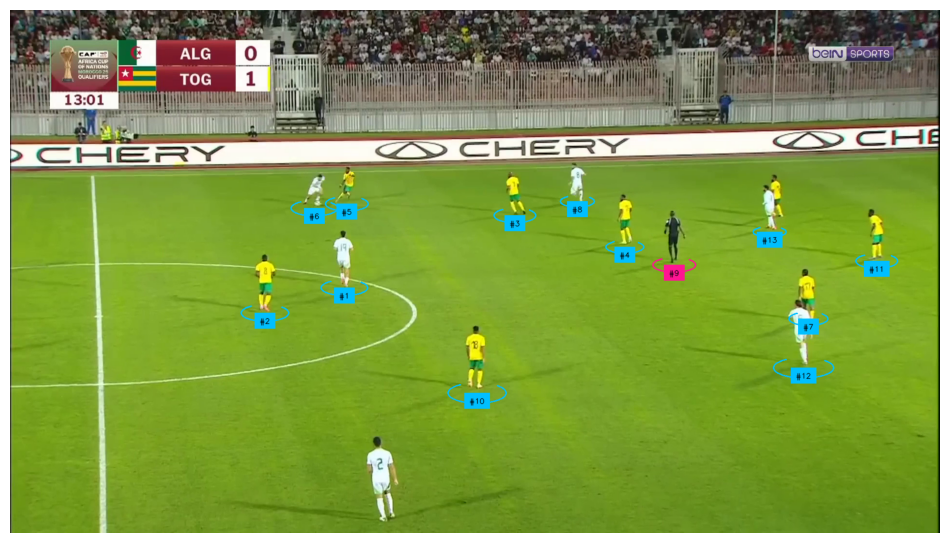

In [ ]:
SOURCE_VIDEO_PATH = "/content/drive/MyDrive/computer vision/Football/input video/dz_raw.mp4"
BALL_ID = 0

ellipse_annotator = sv.EllipseAnnotator(
    color=sv.ColorPalette.from_hex(['#00BFFF', '#FF1493', '#FFD700']),
    thickness=2
)

label_annotator = sv.LabelAnnotator(
    color=sv.ColorPalette.from_hex(['#00BFFF', '#FF1493', '#FFD700']),
    text_color=sv.Color.from_hex("#000000"),
    text_position=sv.Position.BOTTOM_CENTER
)

triangle_annotator = sv.TriangleAnnotator(
    color=sv.Color.from_hex("#FFD700"),
    base=20, height=17
)

tracker = sv.ByteTrack()
tracker.reset()

frame_generator = sv.get_video_frames_generator(SOURCE_VIDEO_PATH)
frame = next(frame_generator)

result = PLAYER_DETECTION_MODEL.infer(frame, confidence=0.3)[0]
detections = sv.Detections.from_inference(result)

ball_detections = detections[detections.class_id == BALL_ID]
ball_detections.xyxy = sv.pad_boxes(xyxy=ball_detections.xyxy, px=10)

all_detections = detections[detections.class_id != BALL_ID]
all_detections = all_detections.with_nms(threshold=0.5, class_agnostic=True)

all_detections.class_id = all_detections.class_id - 1
all_detections = tracker.update_with_detections(all_detections)

labels = [f"#{tracker_id}" for tracker_id in all_detections.tracker_id]

annotated_frame = frame.copy()
annotated_frame = ellipse_annotator.annotate(annotated_frame, all_detections)
annotated_frame = triangle_annotator.annotate(annotated_frame, ball_detections)
annotated_frame = label_annotator.annotate(annotated_frame, all_detections, labels=labels)

sv.plot_image(annotated_frame)

In [ ]:
from tqdm import tqdm
import supervision as sv

# Paths to source and target video
SOURCE_VIDEO_PATH = "/content/drive/MyDrive/computer vision/Football/input video/dz_raw.mp4"
TARGET_VIDEO_PATH = "/content/drive/MyDrive/computer vision/Football/output video/ball_tracking.mp4"

# Annotators for different visual elements
ellipse_annotator = sv.EllipseAnnotator(
    color=sv.ColorPalette.from_hex(['#00BFFF', '#FF1493', '#FFD700']),
    thickness=2
)

label_annotator = sv.LabelAnnotator(
    color=sv.ColorPalette.from_hex(['#00BFFF', '#FF1493', '#FFD700']),
    text_color=sv.Color.from_hex("#000000"),
    text_position=sv.Position.BOTTOM_CENTER
)

triangle_annotator = sv.TriangleAnnotator(
    color=sv.Color.from_hex("#FFD700"),
    base=20, height=17
)

# Tracker initialization
tracker = sv.ByteTrack()
tracker.reset()

# Retrieve video information and create video sink
video_info = sv.VideoInfo.from_video_path(SOURCE_VIDEO_PATH)
video_sink = sv.VideoSink(TARGET_VIDEO_PATH, video_info=video_info)

# Frame generator to iterate through video frames
frame_generator = sv.get_video_frames_generator(SOURCE_VIDEO_PATH)

# Start video writing process
with video_sink:
    for frame in tqdm(frame_generator, total=video_info.total_frames):
        # Run player detection model inference on the frame
        result = PLAYER_DETECTION_MODEL.infer(frame, confidence=0.3)[0]
        detections = sv.Detections.from_inference(result)

        # Separate ball detections and pad for better visibility
        ball_detections = detections[detections.class_id == BALL_ID]
        ball_detections.xyxy = sv.pad_boxes(xyxy=ball_detections.xyxy, px=10)

        # Process and track player detections
        all_detections = detections[detections.class_id != BALL_ID]
        all_detections = all_detections.with_nms(threshold=0.5, class_agnostic=True)
        all_detections.class_id = all_detections.class_id - 1
        all_detections = tracker.update_with_detections(all_detections)

        # Create labels with tracker IDs
        labels = [f"#{tracker_id}" for tracker_id in all_detections.tracker_id]

        # Annotate frame with detections
        annotated_frame = frame.copy()
        annotated_frame = ellipse_annotator.annotate(annotated_frame, all_detections)
        annotated_frame = triangle_annotator.annotate(annotated_frame, ball_detections)
        annotated_frame = label_annotator.annotate(annotated_frame, all_detections, labels=labels)

        # Write the annotated frame to the output video
        video_sink.write_frame(annotated_frame)


100%|██████████| 710/710 [00:58<00:00, 12.06it/s]


In [8]:
from tqdm import tqdm

SOURCE_VIDEO_PATH = "/content/drive/MyDrive/computer vision/football/input video/dz_raw.mp4"
PLAYER_ID = 1
STRIDE = 30

def extract_crops(source_video_path: str):
    frame_generator = sv.get_video_frames_generator(
        source_video_path, stride=STRIDE)

    crops = []
    for frame in tqdm(frame_generator, desc='collecting crops'):
        result = PLAYER_DETECTION_MODEL.infer(frame, confidence=0.3)[0]
        detections = sv.Detections.from_inference(result)
        detections = detections.with_nms(threshold=0.5, class_agnostic=True)
        detections = detections[detections.class_id == PLAYER_ID]
        crops += [
            sv.crop_image(frame, xyxy)
            for xyxy
            in detections.xyxy]


    return crops




In [9]:
crops = extract_crops(SOURCE_VIDEO_PATH)

collecting crops: 24it [00:10,  2.19it/s]


In [10]:
len(crops)

296

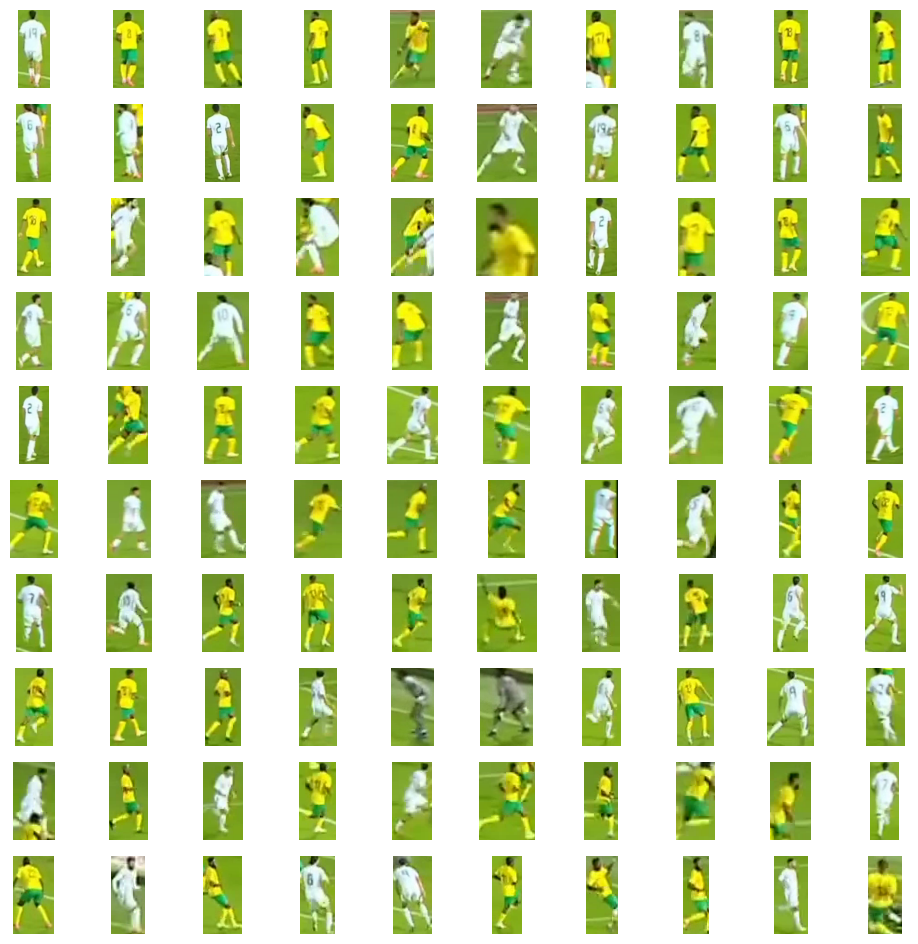

In [11]:
sv.plot_images_grid(crops[:100], grid_size=(10,10))

In [12]:
import torch
from transformers import AutoProcessor, SiglipVisionModel

SIGLIP_MODEL_PATH = 'google/siglip-base-patch16-224'

DEVICE = 'cuda' if torch.cuda.is_available() else 'cpu'
EMBEDDINGS_MODEL = SiglipVisionModel.from_pretrained(SIGLIP_MODEL_PATH).to(DEVICE)
EMBEDDINGS_PROCESSOR = AutoProcessor.from_pretrained(SIGLIP_MODEL_PATH)


The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.


config.json:   0%|          | 0.00/432 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/813M [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/368 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/711 [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/798k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/409 [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.40M [00:00<?, ?B/s]

In [13]:
import numpy as np
from more_itertools import chunked

BATCH_SIZE = 32

crops = [sv.cv2_to_pillow(crop) for crop in crops]
batches = chunked(crops, BATCH_SIZE)
data = []
with torch.no_grad():
    for batch in tqdm(batches, desc='embedding extraction'):
        inputs = EMBEDDINGS_PROCESSOR(images=batch, return_tensors="pt").to(DEVICE)
        outputs = EMBEDDINGS_MODEL(**inputs)
        embeddings = torch.mean(outputs.last_hidden_state, dim=1).cpu().numpy()
        data.append(embeddings)

data = np.concatenate(data)

embedding extraction: 10it [00:05,  1.95it/s]


In [ ]:
data.shape

(296, 768)

In [14]:
pip install umap-learn

In [15]:
import umap
from sklearn.cluster import KMeans

REDUCER = umap.UMAP(n_components=3)
CLUSTERING_MODEL = KMeans(n_clusters=2)

In [16]:
projections = REDUCER.fit_transform(data)

In [ ]:
projections.shape

(296, 3)

In [17]:
clusters = CLUSTERING_MODEL.fit_predict(projections)

In [18]:
clusters[:10]

array([1, 0, 0, 0, 0, 1, 0, 1, 0, 0], dtype=int32)

In [19]:
team_0 = [

        crop
        for crop, cluster in zip(crops, clusters)
        if cluster == 0
]

team_1 = [

        crop
        for crop, cluster in zip(crops, clusters)
        if cluster == 1
]

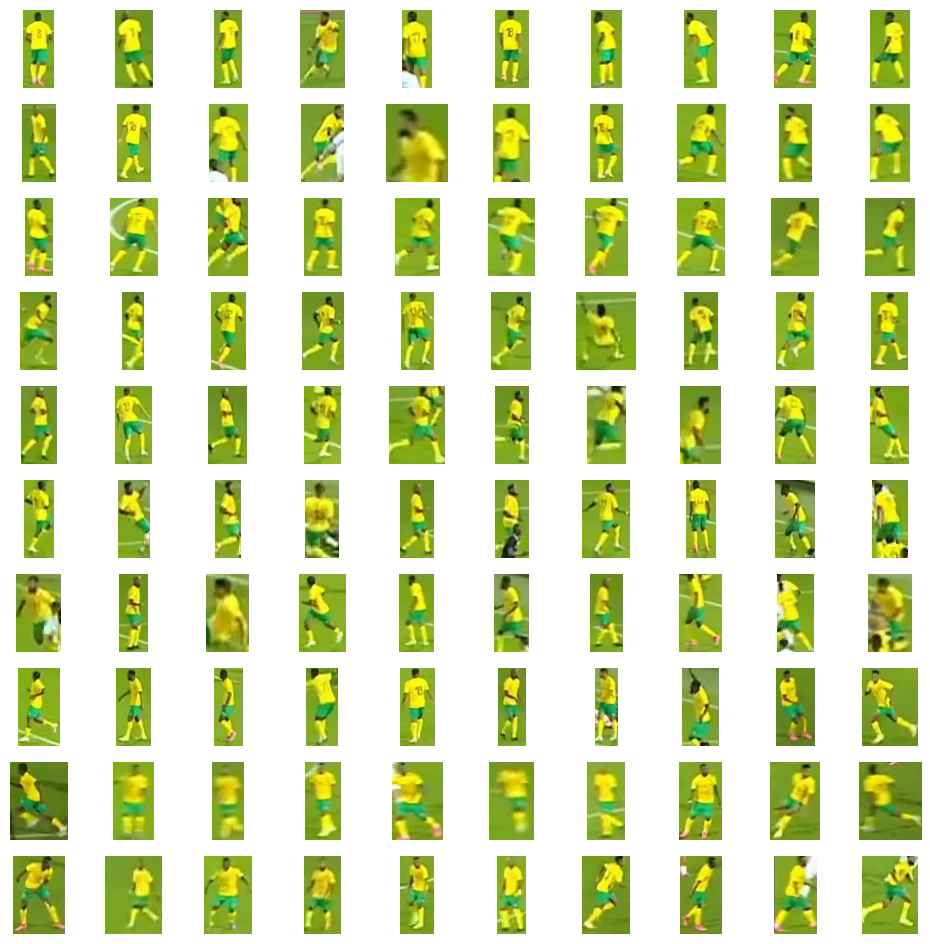

In [ ]:
sv.plot_images_grid(team_0[0:100], grid_size=(10,10))

In [ ]:
import supervision as sv
from sports.common.team import TeamClassifier
from tqdm import tqdm

# Paths to the source and target video
SOURCE_VIDEO_PATH = "/content/drive/MyDrive/computer vision/football/input video/dz_raw.mp4"
TARGET_VIDEO_PATH = "/content/drive/MyDrive/computer vision/football/output/team_classification.mp4"
BALL_ID = 0
PLAYER_ID = 1

# Team classifier setup
crops = extract_crops(SOURCE_VIDEO_PATH)
team_classifier = TeamClassifier(device=DEVICE)
team_classifier.fit(crops)

# Annotators for different visual elements
ellipse_annotator = sv.EllipseAnnotator(
    color=sv.ColorPalette.from_hex(['#00BFFF', '#FF1493', '#FFD700']),
    thickness=2
)

label_annotator = sv.LabelAnnotator(
    color=sv.ColorPalette.from_hex(['#00BFFF', '#FF1493', '#FFD700']),
    text_color=sv.Color.from_hex("#000000"),
    text_position=sv.Position.BOTTOM_CENTER
)

triangle_annotator = sv.TriangleAnnotator(
    color=sv.Color.from_hex("#FFD700"),
    base=20, height=17
)

# Tracker initialization
tracker = sv.ByteTrack()
tracker.reset()

# Retrieve video information and create video sink
video_info = sv.VideoInfo.from_video_path(SOURCE_VIDEO_PATH)
video_sink = sv.VideoSink(TARGET_VIDEO_PATH, video_info=video_info)

# Frame generator to iterate through video frames
frame_generator = sv.get_video_frames_generator(SOURCE_VIDEO_PATH)

# Start video writing process
with video_sink:
    for frame in tqdm(frame_generator, total=video_info.total_frames):
        # Run player detection model inference on the frame
        result = PLAYER_DETECTION_MODEL.infer(frame, confidence=0.3)[0]
        detections = sv.Detections.from_inference(result)

        # Separate ball detections and pad for better visibility
        ball_detections = detections[detections.class_id == BALL_ID]
        ball_detections.xyxy = sv.pad_boxes(xyxy=ball_detections.xyxy, px=10)

        # Process and track player detections
        all_detections = detections[detections.class_id != BALL_ID]
        all_detections = all_detections.with_nms(threshold=0.5, class_agnostic=True)
        all_detections = tracker.update_with_detections(all_detections)

        # Filter only player detections for team classification
        players_detections = all_detections[all_detections.class_id == PLAYER_ID]
        players_crops = [sv.crop_image(frame, xyxy) for xyxy in players_detections.xyxy]

        # Classify each player and update their class IDs
        players_detections.class_id = team_classifier.predict(players_crops)

        # Create labels with tracker IDs
        labels = [f"#{tracker_id}" for tracker_id in players_detections.tracker_id]

        # Annotate frame with detections
        annotated_frame = frame.copy()
        annotated_frame = ellipse_annotator.annotate(annotated_frame, players_detections)
        annotated_frame = triangle_annotator.annotate(annotated_frame, ball_detections)
        annotated_frame = label_annotator.annotate(annotated_frame, players_detections, labels=labels)

        # Write the annotated frame to the output video
        video_sink.write_frame(annotated_frame)


collecting crops: 24it [00:12,  1.97it/s]
Embedding extraction: 10it [00:03,  2.57it/s]
  0%|          | 0/710 [00:00<?, ?it/s]
Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  5.84it/s]
  0%|          | 1/710 [00:05<1:04:13,  5.44s/it]
Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  4.68it/s]
  0%|          | 2/710 [00:05<28:39,  2.43s/it]  
Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  6.49it/s]
  0%|          | 3/710 [00:06<16:56,  1.44s/it]
Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  6.81it/s]
  1%|          | 4/710 [00:06<11:20,  1.04it/s]
Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  6.97it/s]
  1%|          | 5/710 [00:06<08:16,  1.42it/s]
Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  6.92it/s]
  1%|          | 6/710 [00:06<06:25,  1.83it/s]
Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1

In [ ]:
import supervision as sv
from sports.common.team import TeamClassifier
from tqdm import tqdm

# Paths to the source and target video
SOURCE_VIDEO_PATH = "/content/drive/MyDrive/computer vision/Football/input video/dz_raw.mp4"
TARGET_VIDEO_PATH = "/content/drive/MyDrive/computer vision/Football/output video/team_and_referee_detection.mp4"
BALL_ID = 0
PLAYER_ID = 1
REFEREE_ID = 2

# Team classifier setup for players
crops = extract_crops(SOURCE_VIDEO_PATH)
team_classifier = TeamClassifier(device=DEVICE)
team_classifier.fit(crops)

# Annotators for different visual elements
ellipse_annotator = sv.EllipseAnnotator(
    color=sv.ColorPalette.from_hex(['#00BFFF', '#FF1493', '#FFD700']),
    thickness=2
)

label_annotator = sv.LabelAnnotator(
    color=sv.ColorPalette.from_hex(['#00BFFF', '#FF1493', '#FFD700']),
    text_color=sv.Color.from_hex("#000000"),
    text_position=sv.Position.BOTTOM_CENTER
)

triangle_annotator = sv.TriangleAnnotator(
    color=sv.Color.from_hex("#FFD700"),
    base=20, height=17
)

# Tracker initialization
tracker = sv.ByteTrack()
tracker.reset()

# Retrieve video information and create video sink
video_info = sv.VideoInfo.from_video_path(SOURCE_VIDEO_PATH)
video_sink = sv.VideoSink(TARGET_VIDEO_PATH, video_info=video_info)

# Frame generator to iterate through video frames
frame_generator = sv.get_video_frames_generator(SOURCE_VIDEO_PATH)

# Start video writing process
with video_sink:
    for frame in tqdm(frame_generator, total=video_info.total_frames):
        # Run player detection model inference on the frame
        result = PLAYER_DETECTION_MODEL.infer(frame, confidence=0.3)[0]
        detections = sv.Detections.from_inference(result)

        # Separate ball detections and pad for better visibility
        ball_detections = detections[detections.class_id == BALL_ID]
        ball_detections.xyxy = sv.pad_boxes(xyxy=ball_detections.xyxy, px=10)

        # Process and track detections for players and referees
        relevant_detections = detections[(detections.class_id == PLAYER_ID) | (detections.class_id == REFEREE_ID)]
        relevant_detections = relevant_detections.with_nms(threshold=0.5, class_agnostic=True)
        tracked_detections = tracker.update_with_detections(relevant_detections)

        # Filter player and referee detections
        player_detections = tracked_detections[tracked_detections.class_id == PLAYER_ID]
        referee_detections = tracked_detections[tracked_detections.class_id == REFEREE_ID]

        # Crop player images and classify teams (skip referees)
        player_crops = [sv.crop_image(frame, xyxy) for xyxy in player_detections.xyxy]
        player_detections.class_id = team_classifier.predict(player_crops)

        # Generate labels with tracker IDs for players and referees
        player_labels = [f"Player #{tracker_id}" for tracker_id in player_detections.tracker_id]
        referee_labels = [f"Referee #{tracker_id}" for tracker_id in referee_detections.tracker_id]

        # Annotate frame with detections
        annotated_frame = frame.copy()
        annotated_frame = ellipse_annotator.annotate(annotated_frame, player_detections)
        annotated_frame = ellipse_annotator.annotate(annotated_frame, referee_detections)  # Annotate referees
        annotated_frame = triangle_annotator.annotate(annotated_frame, ball_detections)
        annotated_frame = label_annotator.annotate(annotated_frame, player_detections, labels=player_labels)
        annotated_frame = label_annotator.annotate(annotated_frame, referee_detections, labels=referee_labels)

        # Write the annotated frame to the output video
        video_sink.write_frame(annotated_frame)


collecting crops: 24it [00:23,  1.01it/s]
Embedding extraction: 10it [00:07,  1.32it/s]
  0%|          | 0/710 [00:00<?, ?it/s]
Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  3.58it/s]
  0%|          | 1/710 [00:13<2:39:02, 13.46s/it]
Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  4.01it/s]
  0%|          | 2/710 [00:13<1:08:36,  5.81s/it]
Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  4.83it/s]
  0%|          | 3/710 [00:14<39:28,  3.35s/it]  
Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  4.92it/s]
  1%|          | 4/710 [00:14<25:53,  2.20s/it]
Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  5.46it/s]
  1%|          | 5/710 [00:15<18:17,  1.56s/it]
Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  5.32it/s]
  1%|          | 6/710 [00:15<13:51,  1.18s/it]
Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction:

In [20]:
import supervision as sv
from sports.common.team import TeamClassifier
from tqdm import tqdm

# Paths to the source and target video
SOURCE_VIDEO_PATH = "/content/drive/MyDrive/computer vision/football/input video/dz_raw.mp4"
TARGET_VIDEO_PATH = "/content/drive/MyDrive/computer vision/football/output/team_and_referee_detection.mp4"
BALL_ID = 0
PLAYER_ID = 1
REFEREE_ID = 2

# Team classifier setup for players
crops = extract_crops(SOURCE_VIDEO_PATH)
team_classifier = TeamClassifier(device=DEVICE)
team_classifier.fit(crops)

# Annotators for different visual elements
ellipse_annotator = sv.EllipseAnnotator(
    color=sv.ColorPalette.from_hex(['#00BFFF', '#FF1493', '#FFD700']),
    thickness=2
)

label_annotator = sv.LabelAnnotator(
    color=sv.ColorPalette.from_hex(['#00BFFF', '#FF1493', '#FFD700']),
    text_color=sv.Color.from_hex("#000000"),
    text_position=sv.Position.BOTTOM_CENTER
)

triangle_annotator = sv.TriangleAnnotator(
    color=sv.Color.from_hex("#FFD700"),
    base=20, height=17
)

# Tracker initialization
tracker = sv.ByteTrack()
tracker.reset()

# Retrieve video information and create video sink
video_info = sv.VideoInfo.from_video_path(SOURCE_VIDEO_PATH)
video_sink = sv.VideoSink(TARGET_VIDEO_PATH, video_info=video_info)

# Frame generator to iterate through video frames
frame_generator = sv.get_video_frames_generator(SOURCE_VIDEO_PATH)

# Start video writing process
with video_sink:
    for frame in tqdm(frame_generator, total=video_info.total_frames):
        # Run player detection model inference on the frame
        result = PLAYER_DETECTION_MODEL.infer(frame, confidence=0.3)[0]
        detections = sv.Detections.from_inference(result)

        # Separate ball detections and pad for better visibility
        ball_detections = detections[detections.class_id == BALL_ID]
        ball_detections.xyxy = sv.pad_boxes(xyxy=ball_detections.xyxy, px=10)

        # Process and track detections for players and referees
        relevant_detections = detections[(detections.class_id == PLAYER_ID) | (detections.class_id == REFEREE_ID)]
        relevant_detections = relevant_detections.with_nms(threshold=0.5, class_agnostic=True)
        tracked_detections = tracker.update_with_detections(relevant_detections)

        # Filter player and referee detections
        player_detections = tracked_detections[tracked_detections.class_id == PLAYER_ID]
        referee_detections = tracked_detections[tracked_detections.class_id == REFEREE_ID]

        # Crop player images and classify teams (skip referees)
        player_crops = [sv.crop_image(frame, xyxy) for xyxy in player_detections.xyxy]
        player_detections.class_id = team_classifier.predict(player_crops)

        # Generate labels with tracker IDs for players and referees
        player_labels = [f"Player #{tracker_id}" for tracker_id in player_detections.tracker_id]
        referee_labels = [f"Referee #{tracker_id}" for tracker_id in referee_detections.tracker_id]

        # Annotate frame with detections
        annotated_frame = frame.copy()
        annotated_frame = ellipse_annotator.annotate(annotated_frame, player_detections)
        annotated_frame = ellipse_annotator.annotate(annotated_frame, referee_detections)  # Annotate referees
        annotated_frame = triangle_annotator.annotate(annotated_frame, ball_detections)
        annotated_frame = label_annotator.annotate(annotated_frame, player_detections, labels=player_labels)
        annotated_frame = label_annotator.annotate(annotated_frame, referee_detections, labels=referee_labels)

        # Write the annotated frame to the output video
        video_sink.write_frame(annotated_frame)


collecting crops: 24it [00:11,  2.08it/s]
Embedding extraction: 10it [00:03,  2.52it/s]
  0%|          | 0/710 [00:00<?, ?it/s]
Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  5.84it/s]
  0%|          | 1/710 [00:05<59:25,  5.03s/it]
Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  4.57it/s]
  0%|          | 2/710 [00:05<26:53,  2.28s/it]
Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  6.19it/s]
  0%|          | 3/710 [00:05<16:07,  1.37s/it]
Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  6.44it/s]
  1%|          | 4/710 [00:05<11:01,  1.07it/s]
Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  6.24it/s]
  1%|          | 5/710 [00:06<08:09,  1.44it/s]
Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [00:00,  6.50it/s]
  1%|          | 6/710 [00:06<06:23,  1.84it/s]
Embedding extraction: 0it [00:00, ?it/s]
Embedding extraction: 1it [